170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 329s 2us/step


C:\Users\Sudha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.1564 - loss: 2.2904 - val_accuracy: 0.2530 - val_loss: 2.0473
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.1909 - loss: 2.1114 - val_accuracy: 0.2607 - val_loss: 2.0029
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2031 - loss: 2.0728 - val_accuracy: 0.2668 - val_loss: 1.9822
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.2131 - loss: 2.0582 - val_accuracy: 0.2588 - val_loss: 2.0300
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.2184 - loss: 2.0417 - val_accuracy: 0.2823 - val_loss: 1.9743
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2198 - loss: 2.0435 - val_accuracy: 0.2616 - val_loss: 2.0190
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.2295 - loss: 2.0247 - val_accuracy: 0.2728 - val_loss: 1.9856
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2293 - loss: 2.0254 - 

C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sudha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


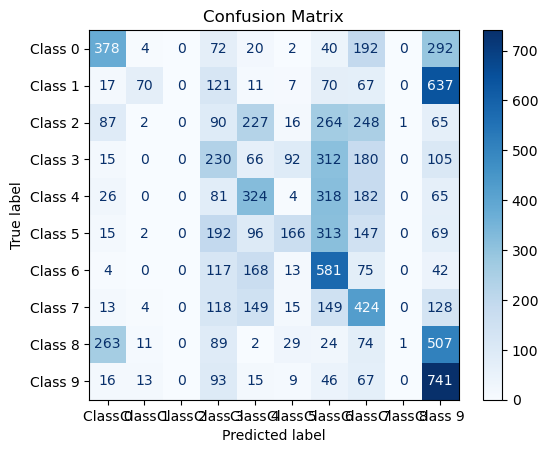

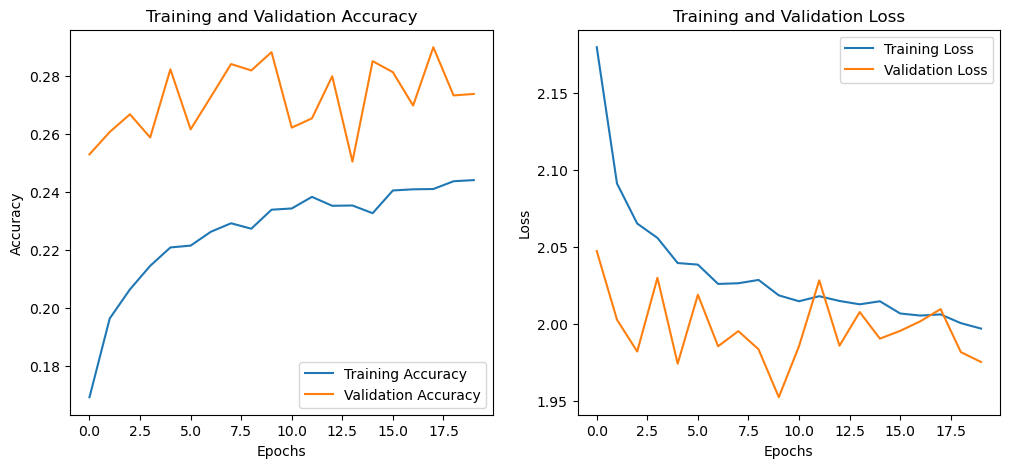

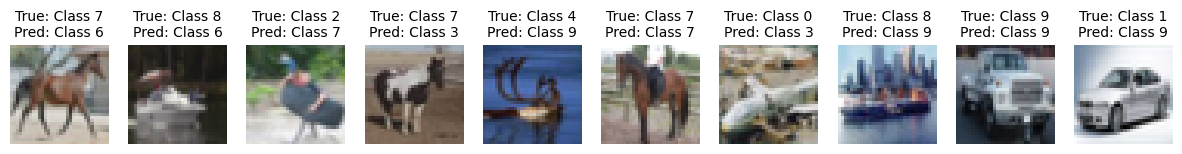

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Build the MLP model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten CIFAR-10 images
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_onehot,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict class probabilities on test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot true labels to class indices if needed
y_true = np.argmax(y_test_onehot, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Classification report
class_names = [f"Class {i}" for i in range(10)]
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Optional: Display some test images with predicted and true labels
def display_sample_predictions(x_test, y_true, y_pred, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(len(x_test), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[idx])
        plt.axis('off')
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}", fontsize=10)
    plt.show()

display_sample_predictions(x_test, y_true, y_pred, class_names)
